In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import pi
import os, sys
#from tftb.generators import anapulse
#from pywt import cwt #pywavelets for scalograms
import argparse

from scipy import signal
#from scipy.signal import cwt, ricker, morlet
import pywt

In [2]:
def compute_intervals(filename):
    ts = pd.read_csv(filename, header=None)
    X = ts[0]
    y = ts[1]
    X = X.values
    intervals = []
    for i in range(0, len(X)-1):
        intervals.append(X[i+1]-X[i])
    #print(intervals)
    #print(len(intervals))
    return(intervals)


In [8]:
def scaleogram(filename):

    #still needs some work as there are multiple libraries we can use to create scaleograms
    
    print("Creating scaleogram")
    ts = pd.read_csv(filename, header=None)
    
    #X is some sort of time value, original dataset does not start at 0
    #Y value is (assumedly) dependent variable
    X = ts[0]
    y = ts[1]
   
    #index 9 is for X of "data/raw/"X-blah.format"
    fn = filename[9:]
    label = 0 if fn[0] == "A" else 1
    new_filename = "data/images/scaleograms/"+fn[:-4]+".png"
    
    #signal length = 8100
    #sampling frequency =~~~~ 375. It's variable..
    
    sig = y.values
    #Fs = 128   
    #t0 = 0.0
    #t1 = 60.0  
    #t = np.linspace(0, 1, 128, endpoint=False)
    
    #maybe widths is the distances btwn x points? like variable sampling freq
    widths = np.logspace(-1.2, 4, num=300, base=10.0) #most similar to MATLAB results
    #cwtmatr = cwt(sig, ricker, widths) 
    cwtmatr, freqs = pywt.cwt(sig, widths, 'morl')
    

    plt.figure(figsize=(20,10))
    fig = plt.imshow(abs(cwtmatr), cmap='jet', aspect='auto')#, vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())    
    #plt.figure(figsize=(4.32,2.88))
    
    #get rid of axis and whitespace for cNN algorithm
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig(new_filename, bbox_inches='tight', pad_inches = 0)
    plt.clf()
    
    
    return (fn[:-4]+".png", label)


In [9]:
def plot_time_series(filename):
    print("Creating plot")
    ts = pd.read_csv(filename, header=None)
    X = ts[0]
    y = ts[1]
    fn = filename[9:]
    label = 0 if fn[0] == "A" else 1
    new_filename = "data/images/plots/"+fn[:-4]+".png"
    
    plt.figure(figsize=(20,10))
    plt.plot(X, y)
    plt.savefig(new_filename)
    plt.clf()
    
    return (fn[:-4]+".png", label)

In [10]:
def plot_all(raw_dir, final_dir, plot):
    print("Creating with method " + plot.__name__)
    data = []

    for filename in os.listdir(raw_dir):
        if filename.endswith(".csv"):
            tpl = plot(raw_dir+filename)
            data.append(tpl)
            data.append(tpl) #second append for small data issuse
    data = pd.DataFrame(data, columns=["filename", "label"])
    data.to_csv(final_dir+"images.csv", index=False)


Creating with method scaleogram
Creating scaleogram


KeyboardInterrupt: 

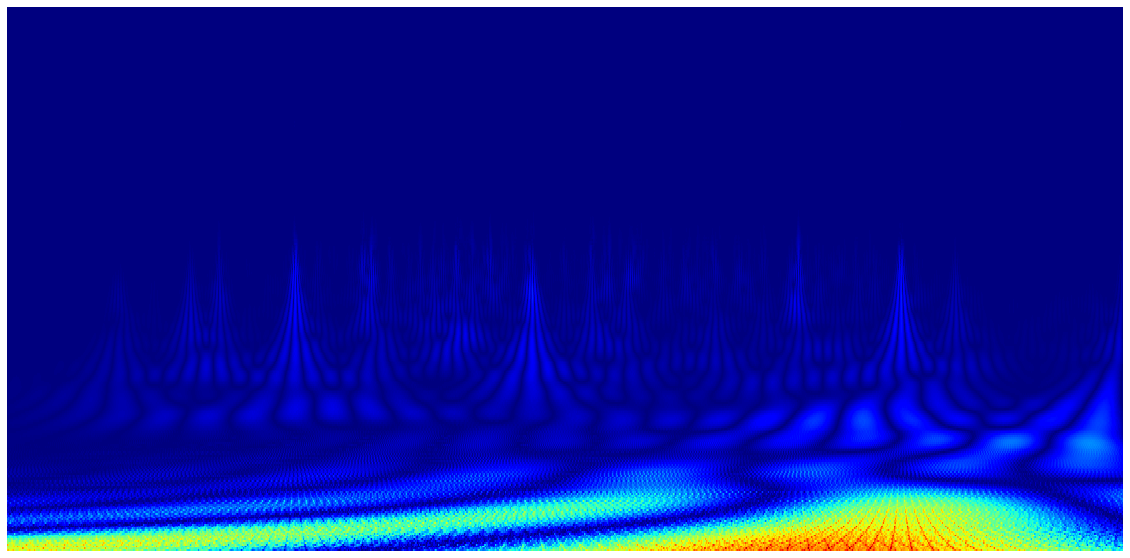

In [11]:
visualization_types = {"plot": plot_time_series, "scaleogram": scaleogram}

plot_all("data/raw/", "data/compiled/", scaleogram)